[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Binomial.ipynb)

# Definition

The binomial distribution is a discrete probability distribution that describes the probability of obtaining exactly k successes out of n Bernoulli trials, which are individual binary outcomes that each have a success probability of p. For example, if you flip a coin 10 times, what is the probability that it will come up heads 0, 1, 2, ... 10 times?

Mathematically, this distribution defines the probability of obtaining *k* successes in *n* trials given a constant probability of success *p* on each trial, which is defined as:

[1] $P(X=k\: successes)=\left ( \frac{n}{k} \right )p^{k}\left ( 1-p \right )^{n-k}$

for *k* = 0, 1, 2, ... , *n*, and where

$\left ( \frac{n}{k} \right )=\frac{n!}{k!\left ( n-k \right )!}$

 is called the "binomial coefficient" and is pronounced "[n-choose-k](https://www.hackmath.net/en/calculator/n-choose-k)"

# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Probability Distributions/Binomial.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [ ]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

# Tutorial

In [ ]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials 
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')

708 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.7080


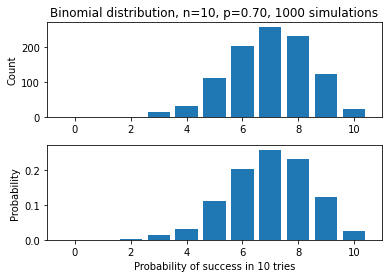

In [ ]:
# The full probability distribution describes the probabilty of obtaining each 
#   possible number of successes (k), given n and p. If we set n=10, the the 
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate 
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram) 
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

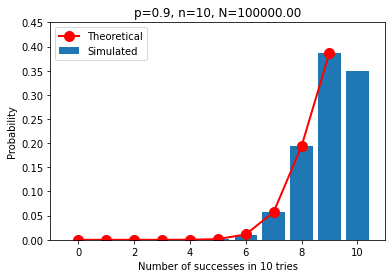

In [ ]:
# Now let's make a fun animation showing different values of p and N. 
#   Note that, of course, the more picks you make of the random variable 
#   (higher N), the more closely the outcomes (the "samples") match the true 
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)
        
        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)



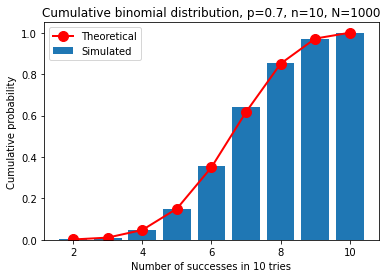

In [ ]:
# The cumulative distribution function is just the proability of obtaining an 
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so 
#   it is a probability function and not just a histogram -- note that the final 
#   value in the cdf should equal 1 because every value should be equal to or 
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find 
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

# Neuroscience Example: Quantal Release

From: Johnson, E.W., and Wernig, A. (1971). [The binomial nature of transmitter release at the crayfish neuromuscular junction](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1331610/). J Physiol 218, 757-767. 

Classic studies by [Bernard Katz and colleagues](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2151334/) indicated that chemical neurotransmitters are released from presynaptic nerve terminals in discrete quanta, or packets, with a relatively constant release probability. A straightforward implication of this idea is that the release statistics (i.e., the distribution of the number of quanta that are actually released in response to a given event like an action potential reaching the presynaptic nerve terminal) should follow a binomial distribution. As stated by Johnson and Wernig:

"If the average probability of release is constant, then it follows from the hypothesis that the relative frequency of 0, 1, 2, 3, . . . quantal releases in a series of trials is given by the successive terms in the binomial expansion $(p + q)^n$, where *q*=1–*p* is the average probability that a quantum will not be released. In a given trial, the probability that *x* quanta will be released (*px*) is given by the binomial term" [i.e., Eq. 1, above, but substitute *x* for *k*].

In other words, if there are *n* available quanta in a presynaptic terminal, and each is released with probability *p*, then the number of quanta that are actually released should follow a binomial distribution with parameters *n* and *p*.

Answers to the exercises below will be found [here](https://github.com/PennNGG/Quantitative-Neuroscience/tree/master/Answers%20to%20Exercises/Python) after the due date.

## Exercise 1
Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [ ]:
#exercise 1 requires 3 values: n, p, and k (p=probability, n=number of bernoulli trials, k=possible values of measured events)
#here n=10 (for 10 possible quanta?), p= 0.2 to represent release probability, and k=11 to represent all possible quantal release events

n = 10
p = 0.2
k = 11
prob = binom.pmf(k,n,p)  #this creates an array of probabilities of obtaining each 'k' value, given n and p
                         #how do you know when to use pmf vs rvs or other suffixes for binom.?

for A, B in zip(k, prob):       #<--what do these functions mean and why don't they work for me? I've typed them in just as the answer key suggests
  print:(f'k={A:2d}: p={B:.2f}') #<--what do these function mean?

TypeError: ignored

## Exercise 2
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability *p*(*data* | *parameters*) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see [here](https://www.psychologicalscience.org/observer/bayes-for-beginners-probability-and-likelihood) for an extended discussion). The maximum value of this function is called the maximum likelihood. 

In [ ]:
#exercise 2 requires 2 values that are fixed: k and n
#k = 8 (represents quanta observed to release) and n = 14 (number of available quanta)
#here we want to know what happens if we vary p (our release probability)
#because we are varying a parameter and not the data, this is a likelihood function, not a probability function

k = 8
n = 14

ps = np.arrange(0.1, 1.0, 0.1)    #<-- this function, as I understand it, is saying go from 0.1->1 in 0.1 increments? also what is ps here and what does the arrange function do exactly
prob = [binom.pmf(k,n,x)for x in ps] #<- what is x and ps here?

for A, B in zip(ps, prob):  #<--what are A and B here and what is zip
    print(f'p={A:.1f}: binomial probability={B:.4f}') #<--I kind of understand that this is deciding the format that the list of binomial probabilities for our release probabilities.
                                                      #like it's saying the output will look like p=___: binomial probability=____. The orange text represents printed text letter for letter and the f' indicates an f string
                                                      #but i don't know where the functions in the curly brackets come from

AttributeError: ignored

## Exercise 3

Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

In [ ]:
#exercise 3 requires 4 fixed values: n1, n2, p, k1, and k2
#n1 and n2 are number of available quanta (same for both trial runs)
#k1 and k2 are observed quantal releases from both trials
#p is release probability

n1 = 14
n2 = 14
k1 = 8
k2 = 5
p_release = 0.1

#to get the total likelihood of both events, we first need to know the likelihood of each individual event

prob1 = binom.pmf(k1,n1,p_release) #<--this will create a probability for k1 given the values n1 and p
prob2 = binom.pmf(k2,n2,p_release) #this does the same thing for the second experiment
total_prob = prob1 * prob2 #<--computing the product of the probabilities as independent events
total_log_prob = np.log(prob1) + np.log(prob2) #<--sums the log of probability also as independent events
print(f'total probability = {total_prob:.3}, total log probability = {total_log_prob:.3f}')

#the rest of the code for this answer seems to be what is making the plots, I don't understand most of it but it looks like
#some of it is important from matplotlib. Can we go over how to get these? These plots weren't required for the question so maybe do this last if there's time?



total probability = 1.24e-07, total log probability = -15.905


## Exercise 4

You keep going and conduct 100 separate experiments and end up with these results:

Measured releases	| Count
---------------- | -------
0 | 0
1 | 0
2 | 3
4 | 10
5 | 19
6 | 26
7 | 16
8 | 16
9 | 5
10 | 5
11 | 0
12 | 0
13 | 0
14 | 0

What is the most likely value of *p* (which we typically refer to as $\hat{p}$, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01? 

BONUS: Use a fitting procedure to find $\hat{p}$.

In [ ]:
#question 4 requires the experimental outcomes to be an array in the code
#other required values are n (total available quanta trials) k (observed quantal releases), and p (release probability)

experimental_outcomes = [0, 0, 3, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0, 0]
n = len(counts)-1 #<--I can tell that this is totaling the quanta available for release, discounting 0 since that is not really a quanta. what does len mean?
ks = np.arrange(n+1) #<--this is adding a value back onto the list because 0 releases is a possible outcome, but it can't be counted in n because it is not an available quanta
ps = np.arrange(0, 1.01, 0.01) #<--I need this explained, it's making a distribution of release probabilities? starting at 1, up to 1.01, going by increments of 0.01??
                                #still don't totally get how to use np.arrange


#make a binomial distribution for n, p, and k and make a matrix (not sure exactly what a matrix is...like literal rows and columns thing?)
#answer key says columns would be values of release probability and rows are values of observed quantal releases (k)
probs = binom.pmf(matlib.repmat(ks, ps.size, 1), n, matlib.repmat(np.asmatrix(ps.T, 1, ks.size)) #<--to break this down, it's making a binomial distribution using probability mass function
                                                                                #based on k and p (what does .size and 1 mean here?), the n term gives the number of available quanta.
                                                                                #the next thing looks like a piece of imported code from matplotlib, 'asmatrix' means format these parameters as a matrix I think

counts_matrix = matlib.repmat(ks, ps.size, 1) #<-this is a matrix of our outcomes that were input into the original array while we were setting up the experiment
                                              #answer key says they get repeated along columns so that a likelihood for every outcome is calculated at every possible release probability

likelihood_fx = np.prod(probs ** counts_matrix, axis=1)   #<--this is calculating likelihood by taking the likelihoods of each measured outcome and multiplying them together. why is there two ** of these
p_hat_from_likelihood = ps.[np.argmax(likelihood_fx)]     #<--this is calculating p_hat which is the maximum likelihood (I think this is what argmax is saying)

probs[probs<0.0001]=.0001  #<--this is setting some new variable but I don't know why, is the log likelihood dependent on this?
log_likelihood_fx = np.sum(np.log(probs) * counts_matrix, axis=1) #<--this is calculating log likelihood which uses some np command with the sum of something, then a numpy log command, multiplied by all the outcomes in the array, with an axis of 1
p_hat_from_log_likelihood = ps[np.argmax(log_likelihood_fx)] #<--searches for the max from the log likelihood function

p_empirical = np.sum(counts*ks/(np.sum(counts)*n)) #<--is is saying p = favorable outcomes/total outcomes? In other words p = observed quantal releases/all trials.
                                                    #seems to more specifically say some numpy sum command(data*observed quantal releases/(numpy sum for all counts across all trials))

print(f'p = {p_hat_from_likelihood:.3f} from likelihood, {p_hat_from_log_likelihood:.3f} from log likelihood, {p_empirical:.3f} directly')


SyntaxError: ignored

## Exercise 5

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute $\hat{p}$. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [ ]:
#exercise 5 requires 4 values: n, k, p hat, and p null
#n is still total available quanta, k is still quanta that are observed to be relesed
#p hat is the maximum likelihood of quanta that will be released out of total quanta available (<is that a good way to explain that, not sure I understand)

n = 14
k = 7
p_hat = k/n #<--observed data over total possible data. very similar to probability equation, why does this equation work out to be p hat I don't see how it gives a maximum mathmatically
p_null = 0.3

p_value = st.binom_test(k, n, p_null, alternative='greater') #<--gets p value for "one-sided test" according to answer key, what is a one-sided test, where did the function come from, and what does alternative=greater mean
print(f'p value for the null hypothesis that p={p_null:.1f} = {p_value:.4f}') #<--this print function denotes what words will literally be printed in orange, and then in curly brackets calls upon functions to compute to be printed
                                                                              #what does the .1f and .4f mean, it's really the only part here that I can't get


p value for the null hypothesis that p=0.3 = 0.0933


## Bonus Exercise

These data are reproduced from Tables 1 and 2 of Johnson and Wernig. Note that *nx* indicates the number of trials ("release events") with *x* measured events. Each row is a separate experiment (don't worry about the ordering, which here is reproduced as it is in the paper).

Temp (°C)	| n0	| n1	| n2	| n3	| n4	| n5+
--- | --| --- | --- | --- | --- | ---
4.0	| 615	| 206	| 33	| 2	| 0	| 0
3.5	| 604	| 339	| 94	| 11	| 2	| 0
0.0 | 	332	| 126	| 21	| 1	| 0	| 0
2.0	| 573	| 443	| 154	| 28	| 2	| 0
6.5	| 172	| 176	| 89	| 12	| 1	| 0
3.0	| 80	| 224	| 200	| 32	| 4	| 0

You can probably already see that some experiments resulted in primarily zero or one events per trial (e.g., the top experiment), whereas others tended to have more events (e.g., the bottom experiment).

Do the quantal event numbers follow a binomial distribution? If so, then that would lend support to the idea that the events are generated by a process that can be characterized in terms of the number of available quanta and the average probability of release of each quantum.

Provide a qualitative answer to this question by comparing the empirical distributions (see the data table, above) to the predicted binomial distribution. To get the predicted distribution (i.e., the probabilities associated with each value of *k* from Eq. 1, given the release probability p and the number of available quanta *n*), you need to determine both *k* and *n* from the empirical measurements. To determine *p*, use Eq. 5 in the paper: $p=1-\frac{\sigma ^{2}}{m}$

where $\sigma ^{2}$ is the variance and *m* is the mean of the trial-by-trial counts that can be determined from the data. To determine *n*, compute *m*/*p* (because *m* = *n* x *p*).

As an added bonus, also include the predicted Poisson distribution, which can be computed using only the mean number of events (*m*, described above).



# Additional Resources

Working with the binomial distribution in [Matlab](https://www.mathworks.com/help/stats/binomial-distribution.html), [R](https://www.rdocumentation.org/packages/stats/versions/3.3/topics/Binomial), and [Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania